# Belgian economic production model

## Data extraction and conversion

*Original code by Cyril Garneau. Modified by T.W. Alleman in consultation with the BIOMATH research unit headed by prof. Ingmar Nopens.*

Copyright (c) 2020 by T.W. Alleman, BIOMATH, Ghent University. All Rights Reserved.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# OPTIONAL: Load the "autoreload" extension so that package code can change
%load_ext autoreload
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

### NACE Conversion matrices

https://www.nbb.be/doc/dq/e/method/b_necd10.pdf

#### NACE 21 to NACE 10

National-level production model so U (extraterritorial activities must be removed).

In [3]:
columns = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T']
index = ['A','B, C, D, E','F','G-H-I','J','K','L','M-N','O, P, Q','R, S, T']

In [4]:
NACE_21to10_mat = np.zeros([10,20])
NACE_21to10_mat[0,0] = 1
NACE_21to10_mat[1,1:5] = 1
NACE_21to10_mat[2,5] = 1
NACE_21to10_mat[3,6:9] = 1
NACE_21to10_mat[4,9] = 1
NACE_21to10_mat[5,10] = 1
NACE_21to10_mat[6,11] = 1
NACE_21to10_mat[7,12:14] = 1
NACE_21to10_mat[8,14:17] = 1
NACE_21to10_mat[9,17:20] = 1

In [5]:
NACE21to10 = pd.DataFrame(data=NACE_21to10_mat,columns=columns,index=index)
NACE21to10.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T
A,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"B, C, D, E",0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
F,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
G-H-I,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
J,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### NACE 38 to NACE 21

National-level production model so U (extraterritorial activities must be removed).

In [6]:
columns = ['AA','BB','CA','CB','CC','CD','CE','CF','CG','CH','CI','CJ','CK','CL','CM','DD','EE','FF','GG','HH','II','JA','JB','JC','KK','LL','MA','MB','MC','NN','OO','PP','QA','QB','RR','SS','TT']
index = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T']

In [7]:
NACE_38to21_mat = np.zeros([20,37])
NACE_38to21_mat[0,0] = 1
NACE_38to21_mat[1,1] = 1
NACE_38to21_mat[2,2:15] = 1
NACE_38to21_mat[3,15] = 1
NACE_38to21_mat[4,16] = 1
NACE_38to21_mat[5,17] = 1
NACE_38to21_mat[6,18] = 1
NACE_38to21_mat[7,19] = 1
NACE_38to21_mat[8,20] = 1
NACE_38to21_mat[9,21:24] = 1
NACE_38to21_mat[10,24] = 1
NACE_38to21_mat[11,25] = 1
NACE_38to21_mat[12,26:29] = 1
NACE_38to21_mat[13,29] = 1
NACE_38to21_mat[14,30] = 1
NACE_38to21_mat[15,31] = 1
NACE_38to21_mat[16,32:34] = 1
NACE_38to21_mat[17,34] = 1
NACE_38to21_mat[18,35] = 1
NACE_38to21_mat[19,36] = 1

In [8]:
NACE38to21 = pd.DataFrame(data=NACE_38to21_mat,columns=columns,index=index)
NACE38to21.head()

,AA,BB,CA,CB,CC,CD,CE,CF,CG,CH,...,MB,MC,NN,OO,PP,QA,QB,RR,SS,TT
A,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### NACE 64 to NACE 38

National-level production model so U (extraterritorial activities must be removed).

In [9]:
index = ['AA','BB','CA','CB','CC','CD','CE','CF','CG','CH','CI','CJ','CK','CL','CM','DD','EE','FF','GG','HH','II','JA','JB','JC','KK','LL','MA','MB','MC','NN','OO','PP','QA','QB','RR','SS','TT']

In [10]:
IO_df = pd.read_excel("../../data/raw/economical/input-output.xlsx", sheet_name='tbl_8',index_col=[0], header=[0])
codes64 = list(IO_df.index.values[1:-19])
codes64[-1] = '97-98'
codes64.remove('68a')
codes64[codes64.index('68_')]='68'
codes64 = np.array(codes64)
columns = codes64

In [11]:
NACE_64to38_mat = np.zeros([37,63])
NACE_64to38_mat[0,0:3] = 1
NACE_64to38_mat[1,3] = 1
NACE_64to38_mat[2,4] = 1
NACE_64to38_mat[3,5] = 1
NACE_64to38_mat[4,6:9] = 1
NACE_64to38_mat[5,9] = 1
NACE_64to38_mat[6,10] = 1
NACE_64to38_mat[7,11] = 1
NACE_64to38_mat[8,12:14] = 1
NACE_64to38_mat[9,14:16] = 1
NACE_64to38_mat[10,16] = 1
NACE_64to38_mat[11,17] = 1
NACE_64to38_mat[12,18] = 1
NACE_64to38_mat[13,19:21] = 1
NACE_64to38_mat[14,21:23] = 1
NACE_64to38_mat[15,23] = 1
NACE_64to38_mat[16,24:26] = 1
NACE_64to38_mat[17,26] = 1
NACE_64to38_mat[18,27:30] = 1
NACE_64to38_mat[19,30:35] = 1
NACE_64to38_mat[20,35] = 1
NACE_64to38_mat[21,36:38] = 1
NACE_64to38_mat[22,38] = 1
NACE_64to38_mat[23,39] = 1
NACE_64to38_mat[24,40:43] = 1
NACE_64to38_mat[25,43] = 1
NACE_64to38_mat[26,44:46] = 1
NACE_64to38_mat[27,46] = 1
NACE_64to38_mat[28,47:49] = 1
NACE_64to38_mat[29,49:53] = 1
NACE_64to38_mat[30,53] = 1
NACE_64to38_mat[31,54] = 1
NACE_64to38_mat[32,55] = 1
NACE_64to38_mat[33,56] = 1
NACE_64to38_mat[34,57:59] = 1
NACE_64to38_mat[35,59:62] = 1
NACE_64to38_mat[36,62] = 1

In [12]:
NACE64to38 = pd.DataFrame(data=NACE_64to38_mat,columns=columns,index=index)
NACE64to38.head()

,01,02,03,05-09,10-12,13-15,16,17,18,19,...,84,85,86,87-88,90-92,93,94,95,96,97-98
AA,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BB,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CA,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CB,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CC,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### WIOD 55 to NACE 64

National-level production model so U (extraterritorial activities must be removed).

In [13]:
abs_dir = os.getcwd()
rel_dir = os.path.join(abs_dir, '../../data/raw/economical/IHS_Markit_results_compact.csv')
IHS_df = pd.read_csv(rel_dir,header=[0],index_col=[0])
index = IHS_df.index.values[:]

In [14]:
WIOD55toNACE64_mat = np.zeros([55,63])
for i in range(49):
    WIOD55toNACE64_mat[i,i]=1
WIOD55toNACE64_mat[49,49:53]=1
WIOD55toNACE64_mat[50,53]=1
WIOD55toNACE64_mat[51,54]=1
WIOD55toNACE64_mat[52,55:57]=1
WIOD55toNACE64_mat[53,57:62]=1
WIOD55toNACE64_mat[54,62]=1

In [15]:
WIOD55toNACE64 = pd.DataFrame(data=WIOD55toNACE64_mat,columns=columns,index=index)
WIOD55toNACE64.tail()

,01,02,03,05-09,10-12,13-15,16,17,18,19,...,84,85,86,87-88,90-92,93,94,95,96,97-98
O84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
P85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
R_S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Create a multi-sheet excel with all conversion matrices

In [16]:
with pd.ExcelWriter('../../data/interim/economical/conversion_matrices.xlsx') as writer:
    NACE21to10.to_excel(writer, sheet_name='NACE 21 to NACE 10')
    NACE38to21.to_excel(writer, sheet_name='NACE 38 to NACE 21')
    NACE64to38.to_excel(writer, sheet_name='NACE 64 to NACE 38')
    WIOD55toNACE64.to_excel(writer, sheet_name='NACE 64 to WIOD 55')

### Input-output matrix $(Z_{i,j})$

In [17]:
IO_df = pd.read_excel("../../data/raw/economical/input-output.xlsx", sheet_name='tbl_8',index_col=[0], header=[0])

In [18]:
IO_df.head()

,Unnamed: 1,01,02,03,05-09,10-12,13-15,16,17,18,...,Unnamed: 66,P.31/S14,P.31/S15,P3./S13,P.51,P.52+P.53,P.6/S21i,P.6/S21x,P.6/S22,Unnamed: 75
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Total,Final consumption expenditure by households,Final consumption expenditure by NPISH,Final consumption expenditure by government,Gross fixed capital formation,Changes in inventories and acquisition less di...,Intra EA exports,Intra EU non-EA exports,Extra EU exports,Total use basic prices
01,NaN,1135.360954,52.53487,0.0,3.054806,8645.471002,51.263227,0.000000,0.000000,0.0,...,11019.2,2489.48,0,0,62.1795,-329.568,2887.61,389.535,353.405,16871.9
02,NaN,7.486584,0.00000,0.0,0.000000,0.368798,0.000000,264.460687,77.017536,0.0,...,391.283,93.0727,0,0,0,18.2043,101.608,8.46383,35.1685,647.801
03,NaN,0.000000,0.00000,0.0,0.000000,32.105076,0.000000,0.000000,0.000000,0.0,...,146.488,205.664,0,0,0,3.02254,68.8357,3.03205,2.05752,429.1
05-09,NaN,3.281892,0.00000,0.0,70.524424,72.012662,1.779141,0.000000,8.651364,0.0,...,14779.2,24.9084,0,0,0,23.0377,739.976,86.0331,8598.32,24251.5


In [19]:
codes64 = list(IO_df.index.values[1:-19])
codes64[-1] = '97-98'
codes64.remove('68a')
codes64[codes64.index('68_')]='68'
codes64 = np.array(codes64)
print(codes64.shape)

(63,)


In [20]:
IO = IO_df.values[1:-19,1:-10]
print(IO.shape)

(64, 64)


In [21]:
IO=np.delete(IO,45,axis=0) # remove row 68a (adding not necessary since row 68a contains zeros only)
IO[1:-19,44] = IO[1:-19,44] + IO[1:-19,45] # Add column 68a to column 68_
IO=np.delete(IO,45,axis=1)
print(IO.shape)

(63, 63)


In [22]:
IO_new = pd.DataFrame(data=IO,columns=codes64,index=codes64)
IO_new.head()

,01,02,03,05-09,10-12,13-15,16,17,18,19,...,84,85,86,87-88,90-92,93,94,95,96,97-98
01,1135.36,52.5349,0,3.05481,8645.47,51.2632,0,0,0,0,...,18.827,0,10.0982,91.7385,0.102878,2.78215,16.7001,0,1.37227,0
02,7.48658,0,0,0,0.368798,0,264.461,77.0175,0,0,...,0,0,0,0,0,0,0,0,0.979544,0
03,0,0,0,0,32.1051,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
05-09,3.28189,0,0,70.5244,72.0127,1.77914,0,8.65136,0,10792.9,...,5.66646,0,1.0824,0,4.08543,0.158955,1.21494,0,0,0
10-12,2180.09,0.168358,0.02898,0.167061,9434.97,10.2272,1.6863,42.4287,1.31281,100.51,...,223.437,39.5996,318.511,385.203,29.0127,89.4219,7.46886,1.95809,16.1913,0


In [23]:
IO_new.to_csv('../../data/interim/economical/IO_NACE64.csv', index=True)

### Labor compensation $(l_{i,0})$

In [24]:
n_0 = IO_df.values[-15,1:-10]
n_0 = np.delete(n_0,44) 

### Taxes, imports, consumption of fixed capital $(e_{i,0})$

In [25]:
e_0 = IO_df.values[-18,1:-10] + IO_df.values[-17,1:-10] + IO_df.values[-14,1:-10] + IO_df.values[-10,1:-10] + IO_df.values[-7,1:-10] + IO_df.values[-6,1:-10] + IO_df.values[-5,1:-10]
e_0 = np.delete(e_0,44) 
print(e_0.shape)

(63,)


In [26]:
s_0 = IO_df.values[-13,1:-10]
s_0 = np.delete(s_0,44) 
print(s_0)

[602.253999052786 7.93063975492812 0.566565581548559 5.31809395235489
 223.526678336735 78.8242222202516 51.4502902724204 62.2612460395316
 62.2060070456418 11.9623275267225 238.457138584737 0.0 101.580661474297
 68.139012978613 165.105582047362 178.416194315841 133.459874543908
 80.7184582068896 94.3128826897104 134.782147380368 35.5269069991171
 23.4079686274046 54.8590599821557 28.3075745836866 79.6141285096225
 161.20237964181 367.695321032287 54.5013528433463 437.578766785987
 385.267413888853 131.32573671449 165.634882734607 31.329529275147
 254.595733316413 49.6783563407767 147.911335840913 25.5900896696474
 26.4409157654534 24.3064137795987 178.794876551298 8.43191041312247
 7.78357003987214 21.4856118742002 268.58457128013 289.298903119492
 172.101521546212 908.602848104086 16.1192131887798 10.6872960665741
 19.692545179026 1009.0381936299 12.4550641152946 1675.95612012905
 237.795269678951 147.359488277104 923.128369307696 1410.18768852373
 56.0153394939423 237.578505022605 6

### Sectoral output during business-as-usual $(x_{i,0}^{\text{cap}})$

In [27]:
x_0 = IO_df.values[1:-19,-1]
x_0[43] = x_0[43] + x_0[44] # Confirm with Koen or Gert that this needs to be added togheter
x_0 = np.delete(x_0,44) 
print(x_0.shape)

(63,)


### Houshold demand during business-as-usual $(c_{i,0}^d)$

In [28]:
c_0 = IO_df.values[1:-19,-9]
c_0[43] = c_0[43] + c_0[44] # Confirm with Koen or Gert that this needs to be added togheter
c_0 = np.delete(c_0,44)
print(c_0.shape)

(63,)


### Other final demand $(f_{i,0}^d)$

In [29]:
print(IO_df.values[1,-8:-1])

[0 0 62.1795430478152 -329.568392607655 2887.6075316243 389.534555585811
 353.404776072301]


In [30]:
f_0 = np.sum(IO_df.values[1:-19,-8:-1],axis=1)
# "Changes in inventories and acquisition less disposals of valuables" can be negative
# Do I just sum the columns?
f_0[43] = f_0[43] + f_0[44] # Confirm with Koen or Gert that this needs to be added togheter
f_0 = np.delete(f_0,44)
print(f_0.shape)

(63,)


### Intermediate demand $O_{j})$

In [31]:
O_j = np.sum(IO_new.values,axis=1)
print(O_j.shape)

(63,)


### Intermediate use $(O_i)$

In [32]:
O_i = np.sum(IO_new.values,axis=0)
print(O_i.shape)

(63,)


### Check: Does $x_{i,0}^{cap} = O_{i,j} + f_{i,0}^d + c_{i,0}^d$?

In [33]:
print(O_j + c_0 + f_0)
print(x_0)

[16782.25664303605 647.8008781567144 429.100000018839 24251.454891838657
 56386.41481140843 12801.586739663162 4889.53073959741 7857.179345538041
 3192.9964371052956 32573.35976675466 62834.205840851166
 21377.995170900344 14087.336152774744 8863.743899505305
 29680.990206511502 14444.171327529559 15088.70018581143
 10145.447475457437 23305.584749247413 42487.809999591285
 4474.489999982778 17193.0583518465 8468.397300402128 19083.65146722857
 1232.7982596518725 14747.804226155173 68327.50311741307
 11646.301719319683 56373.45366095175 23611.127134556962
 27053.506440222554 5170.989999963751 7891.198960753002 31464.7472335225
 4405.082040541738 19526.856027956317 6022.449526378957 5167.3459173637775
 14002.502740873379 21333.690159021262 20797.83663506495 9447.998000034078
 20463.95800014664 46377.74600025597 20233.055084456442 13253.236731653134
 20054.330000027283 9887.197330695468 2778.6706146356905
 17691.117598885285 7661.368584439091 3225.45371209124 13998.99295412837
 33807.1985

### Answer: no

- change $x_0$

In [34]:
x_0=O_j + c_0 + f_0

### Value added

In [73]:
print(e_0)

[8764.906672237375 309.85502668529324 327.9700613049858 23241.569735373036
 21326.525625664653 8589.720802216487 2151.005197139213 3684.916146058922
 621.7790191785568 13345.244650083574 30180.145430920555
 11163.183105261174 7803.081198433983 3347.810958227344 12458.467211499701
 5809.551833637834 12947.773712491013 7070.1159376508795
 14810.125061239325 29682.028790073266 2788.7005469160576
 13712.332007016523 954.6021852835163 9804.033650326355 45.42471027163623
 6259.232021168997 6261.970719197966 1073.7167453027655 5915.842271867291
 2658.3717260551757 9809.314476651276 2640.056077255328 4105.718160730559
 10461.519032036636 855.736978251861 4412.927330369144 3190.8916261643217
 1839.3972802289584 4388.076922307576 4784.302756947477 5948.853279058659
 1836.3773072606048 4694.852371114297 9111.749291222317 19898.45538980139
 3224.292725870109 9528.11334863603 4575.104577024356 478.53613213122196
 7507.781863307007 373.91200749686345 197.38791280613984
 3532.8590464813824 3498.37516

In [75]:
VA_0 = x_0 - e_0 - n_0 - O_i + s_0
print(VA_0)

[1867.3305205028112 29.4419352892108 9.209912593841366 43.85593882694837
 2122.7477380616747 273.11333563080416 112.5421649197921 262.2975860985602
 140.27573961377124 745.6344580220141 3938.160620576356 2118.1295393922346
 272.25121965462506 192.28242581145628 57.44734961238183 837.6095488505957
 -118.45185218789786 57.149522359580445 1146.1403168572956
 -244.5698008698008 181.2275293236308 222.08780912343417 566.654713492356
 1852.7489882551351 -14.860429494238645 630.2595070137706
 8040.7228665660705 2390.537473820842 13583.90645986038 5843.449827982678
 399.00126423424564 453.0105723410687 237.464592137361 1767.4543592401749
 533.3692013952393 2681.6701882051048 302.6832388080109 611.2778344052056
 1695.7628630203767 2972.926458206272 5078.347930665069 851.871365646481
 4818.204750657458 29259.07642071003 -19268.83173594289 1693.4786271468274
 1347.9131887607266 674.1018531176434 618.0247172632525 3312.0163686209657
 504.89054058028364 129.58940134318118 525.1627208184029
 1222.550

### Desired stock $(n_j)$ --> table 8

In [37]:
nj_df = pd.read_csv("../../data/raw/economical/table_ratio_inv_go.csv", index_col=[0], header=[0])

In [38]:
nj55 = nj_df['ratio_all_inv_go_monthly'].values[:-1]*30
print(nj55.shape)

(55,)


In [39]:
# Convert to NACE64
nj64 = np.zeros(63)
for i in range(nj55.size):
    nj64[WIOD55toNACE64_mat[i,:] == 1] = nj55[i]
print(nj64.shape)

(63,)


### Consumer demand shock $(\epsilon^D)$

In [40]:
ed_df = pd.read_csv("../../data/raw/economical/WIOD_shockdata.csv", index_col=[0], header=[0])
ed_df.head()
ed55 = ed_df['demand.shock.household'].values
print(ed55.shape)

(55,)


In [41]:
# Convert to NACE64
ed64 = np.zeros(63)
for i in range(nj55.size):
    ed64[WIOD55toNACE64_mat[i,:] == 1] = ed55[i]
print(ed64.shape)

(63,)


### Other demand shock $(f^D)$

In [42]:
fd55=np.array([-20,-23,-32,-33,-32,-27,-16,-30,-18,-33,-32,-31,-28,-27,-33,-18,-28,-30,-30,-29,-31,-25,-17,-20,-11,-16,-6,-23,-30,-28,-28,-32,-32,-26,-30,-32,-24,-15,-22,-13,-32,-31,-33,-8,-25,-19,-11,-30,-30,-29,-1,-2,1,-10,-32])
print(fd55.shape)

(55,)


In [43]:
# Convert to NACE64
fd64 = np.zeros(63)
for i in range(fd55.size):
    fd64[WIOD55toNACE64_mat[i,:] == 1] = fd55[i]
print(fd64.shape)

(63,)


### On-site consumption

In [44]:
IHS_df.index.values[:]
names = ['G45','G47','H49','H50','H51','H52','H53','I','L68','M69_M70','O84','P85','R_S','T']
on_site55 = np.zeros(55)
for name in names:
    on_site55[np.where(IHS_df.index.values[:]==name)] = 1
print(on_site55)

on_site64 = np.zeros([63])
for i in range(on_site55.size):
    on_site64[WIOD55toNACE64_mat[i,:] == 1] = on_site55[i]

print(on_site64)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 1. 1. 0. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.]


### Sectoral employees during business-as-usual $(n_{i,0})$

In [45]:
sectoral64_df = pd.read_excel("../../data/raw/economical/Employees_NACE64.xlsx",sheet_name = 'Binnenlands concept - A64', index_col=[0], header=[0])

In [46]:
l0_64 = sectoral64_df.values[7:-1,-1]
print(l0_64.shape)

(63,)


### Sectoral employees during lockdown $(n_{i,\text{lockdown}})$

Survey 25-04-2020

#### NACE 38

In [47]:
sectoral38_lockdown_df = pd.read_excel("../../data/raw/economical/Employees_25-04-2020_NACE38.xlsx",sheet_name = 'Formated data', index_col=[0], header=[0])

In [48]:
l_lockdown38 = (sectoral38_lockdown_df['telework'] + sectoral38_lockdown_df['mix telework-workplace'] + sectoral38_lockdown_df['at workplace']).values[1:]

#### NACE 64

In [49]:
# Telework
telework38 = sectoral38_lockdown_df['telework'].values[1:]
telework64 = np.zeros(63)
for i in range(l_lockdown38.size):
    telework64[NACE_64to38_mat[i,:] == 1] = telework38[i]

# Mix
mix38 = sectoral38_lockdown_df['mix telework-workplace'].values[1:]
mix64 = np.zeros(63)
for i in range(l_lockdown38.size):
    mix64[NACE_64to38_mat[i,:] == 1] = mix38[i]

# Workplace
workplace38 = sectoral38_lockdown_df['at workplace'].values[1:]
workplace64 = np.zeros(63)
for i in range(l_lockdown38.size):
    workplace64[NACE_64to38_mat[i,:] == 1] = workplace38[i]

# Absent
absent38 = sectoral38_lockdown_df['absent'].values[1:]
absent64 = np.zeros(63)
for i in range(l_lockdown38.size):
    absent64[NACE_64to38_mat[i,:] == 1] = absent38[i]

#### Group into dataframe

In [50]:
tuples = [('Business-as-usual', 'Sectoral output (M€/y)'),
            ('Business-as-usual', 'Intermediate demand (M€/y)'),
            ('Business-as-usual', 'Household demand (M€/y)'),
            ('Business-as-usual', 'Other demand (M€/y)'),
            ('Business-as-usual', 'Intermediate use (M€/y)'),          
            ('Business-as-usual','Taxes, imports, consumption fixed capital (M€/y)'),
            ('Business-as-usual', 'Labor compensation (M€/y)'),
            ('Business-as-usual', 'Value added (M€/y)'),
            ('Business-as-usual', 'Employees (x1000)'),
            ('Business-as-usual', 'Desired stock (days)'),
            ('Business-as-usual','On-site consumption (-)'),
            ('Lockdown', 'Consumer demand shock (%)'),
            ('Lockdown', 'Other demand shock (%)'),
            ('Lockdown', 'Telework (%)'),
            ('Lockdown', 'Mix (%)'),
            ('Lockdown', 'Workplace (%)'),
            ('Lockdown', 'Absent (%)'),]

colnames = pd.MultiIndex.from_tuples(tuples, names=['',''])

In [51]:
data = {
    ('Business-as-usual','Sectoral output (M€/y)'): list(x_0),
    ('Business-as-usual','Intermediate demand (M€/y)'): list(O_j),
    ('Business-as-usual','Household demand (M€/y)'): list(c_0),
    ('Business-as-usual','Other demand (M€/y)'): list(f_0),
    ('Business-as-usual', 'Intermediate use (M€/y)'): list(O_i),   
    ('Business-as-usual','Taxes, imports, consumption fixed capital (M€/y)'): list(e_0),
    ('Business-as-usual', 'Labor compensation (M€/y)'): list(n_0),  
    ('Business-as-usual', 'Value added (M€/y)'): list(VA_0),
    ('Business-as-usual','Employees (x1000)'): list(l0_64),
    ('Business-as-usual','Desired stock (days)'): list(nj64),
    ('Business-as-usual','On-site consumption (-)') : list(on_site64),
    ('Lockdown', 'Consumer demand shock (%)'): list(ed64*100),
    ('Lockdown', 'Other demand shock (%)'): list(fd64),
    ('Lockdown', 'Telework (%)'): list(telework64),
    ('Lockdown', 'Mix (%)'): list(mix64),
    ('Lockdown', 'Workplace (%)'): list(workplace64),
    ('Lockdown', 'Absent (%)'): list(absent64),
}
df = pd.DataFrame(data=data,columns=colnames,index=codes64)
df.head()

Business-as-usual                             \
      Sectoral output (M€/y) Intermediate demand (M€/y)   
01              16782.256643               10929.617821   
02                647.800878                 391.283124   
03                429.100000                 146.488319   
05-09           24251.454892               14779.184859   
10-12           56386.414811               18498.304080   

                                                                           \
      Household demand (M€/y) Other demand (M€/y) Intermediate use (M€/y)   
01                2489.480808         3363.158014             6261.035835   
02                  93.072674          163.445080              293.924063   
03                 205.663831           76.947850               64.983586   
05-09               24.908402         9447.361630              705.733216   
10-12            14791.984811        23096.125921            28837.140967   

                                                                    \
      Taxes, imports, other costs (M€/y) Labor compensation (M€/y)   
01                           8764.906672                491.237614   
02                            309.855027                 22.510493   
03                            327.970061                 27.503006   
05-09                       23241.569735                265.614096   
10-12                       21326.525626               4323.527159   

                                                                 \
      Value added (M€/y) Employees (x1000) Desired stock (days)   
01           1265.076521              56.0           128.879069   
02             21.511296               2.3           128.879069   
03              8.643347               0.4           128.879069   
05-09          38.537845               2.5            16.045759   
10-12        1899.221060              98.6            35.503271   

                                               Lockdown  \
      On-site consumption (-) Consumer demand shock (%)   
01                        0.0                     -10.0   
02                        0.0                     -10.0   
03                        0.0                     -10.0   
05-09                     0.0                     -10.0   
10-12                     0.0                     -10.0   

                                                                              
      Other demand shock (%) Telework (%)   Mix (%) Workplace (%) Absent (%)  
01                     -20.0     0.448430  1.255605     95.964126   2.331839  
02                     -23.0     0.448430  1.255605     95.964126   2.331839  
03                     -32.0     0.448430  1.255605     95.964126   2.331839  
05-09                  -33.0    28.559993  4.389402     29.913807   4.765007  
10-12                  -32.0    19.253406  8.415096     54.645352   7.429082

#### Write dataframe to xlsx

In [52]:
df.to_csv('../../data/interim/economical/others.csv', index=True)

### Critical inputs

WIOD 55

https://zenodo.figshare.com/articles/software/Production_networks_and_epidemic_spreading_How_to_restart_the_UK_economy_/12345527/1

#### Matrix is not square by default and contains NaN

In [53]:
IHS_mat = IHS_df.values
new_last_column= np.expand_dims(np.append(IHS_mat[-1,:],1),axis=1)
IHS_mat = np.append(IHS_mat,new_last_column,axis=1)

In [54]:
abs_dir = os.getcwd()
rel_dir = os.path.join(abs_dir, '../../data/raw/economical/IHS_Markit_results_compact.csv')
IHS_df = pd.read_csv(rel_dir,header=[0],index_col=[0])
IHS_df.fillna(0)
IHS_df.head()

,A01,A02,A03,B,C10-C12,C13-C15,C16,C17,C18,C19,...,M69_M70,M71,M72,M73,M74_M75,N,O84,P85,Q,R_S
A01,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
A02,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
A03,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
B,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
C10-C12,1.0,1.0,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [55]:
IHS_df['T']=new_last_column
IHS_df.head()

,A01,A02,A03,B,C10-C12,C13-C15,C16,C17,C18,C19,...,M71,M72,M73,M74_M75,N,O84,P85,Q,R_S,T
A01,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
A02,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
A03,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
B,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
C10-C12,1.0,1.0,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0


#### Convert to NACE 64

Assumptions

In [56]:
NACE64toWIOD55_mat = WIOD55toNACE64_mat

In [57]:
IHS_mat = IHS_df.fillna(0).values
# Convert to all entries  before sector N using the conversion matrix
new64_mat = np.zeros([63,63])
for j in range(49): # row 49 is sector N
    new64 = np.zeros(63)
    orig55 = IHS_mat[j,:]
    for i in range(orig55.size):
        new64[NACE64toWIOD55_mat[i,:] == 1] = orig55[i]
    new64_mat[j,:]=new64
    
# Now we're at row N
# First convert row N using the matrix
new64 = np.zeros(63)
orig55 = IHS_mat[49,:]
for i in range(orig55.size):
    new64[NACE64toWIOD55_mat[i,:] == 1] = orig55[i]
    new64_mat[49:53,:]=new64
# Then modify the diagonal (i.e. no dependency of sector 77 to sector 78 etc.)
new64_mat[49,50:53]=0
new64_mat[50,49]=0
new64_mat[50,51:53]=0
new64_mat[51,49:51]=0
new64_mat[51,52:53]=0
new64_mat[52,49:52]=0

# Then go on from index 50 to 51 (sectors 84 and 85)
for j in range(50,52): # 49 or 63
    new64 = np.zeros(63)
    orig55 = IHS_mat[j,:]
    for i in range(orig55.size):
        new64[NACE64toWIOD55_mat[i,:] == 1] = orig55[i]
    new64_mat[j+3,:]=new64
    
print(orig55)
print(new64)

# Now we're at sectors Q (index 52)
# First convert row Q using the conversion matrix
new64 = np.zeros(63)
orig55 = IHS_mat[52,:]
for i in range(orig55.size):
    new64[NACE64toWIOD55_mat[i,:] == 1] = orig55[i]
    new64_mat[55:57,:]=new64
# Then modify the diagonal (i.e. no dependency of sector 93 to sector 94 etc.)
new64_mat[55,56]=0
new64_mat[56,55]=0

# Now we're at sectors R_S (index 54)
# First convert row R_S using the conversion matrix
new64 = np.zeros(63)
orig55 = IHS_mat[53,:]
for i in range(orig55.size):
    new64[NACE64toWIOD55_mat[i,:] == 1] = orig55[i]
    new64_mat[57:62,:]=new64
# Then modify the diagonal (i.e. no dependency of sector 93 to sector 94 etc.)
new64_mat[57,58:62]=0
new64_mat[58,57]=0
new64_mat[58,59:62]=0
new64_mat[59,57:59]=0
new64_mat[59,60:62]=0
new64_mat[60,57:60]=0
new64_mat[60,61:62]=0
new64_mat[61,57:61]=0

# Convert and insert row T using the conversion matrix
new64 = np.zeros(63)
orig55 = IHS_mat[54,:]
for i in range(orig55.size):
    new64[NACE64toWIOD55_mat[i,:] == 1] = orig55[i]
    new64_mat[62,:]=new64
print(new64_mat)

[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.5 0.  0.5 0.  0.5 1.  0.  0.
 0. ]
[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.5 0.  0.5 0.  0.  0.  0.  0.5
 1.  0.  0.  0.  0.  0.  0.  0.  0. ]
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [58]:
np.diag(new64_mat)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

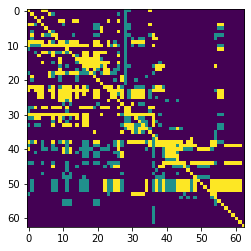

In [59]:
plt.imshow(new64_mat)

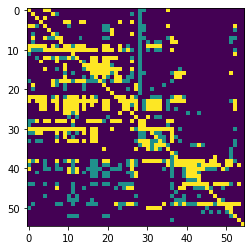

In [60]:
plt.imshow(IHS_mat)

In [61]:
columns = codes64
index = codes64
IHS_critical = pd.DataFrame(data = new64_mat, index=index, columns=columns)
IHS_critical.head()

,01,02,03,05-09,10-12,13-15,16,17,18,19,...,84,85,86,87-88,90-92,93,94,95,96,97-98
01,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
03,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05-09,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10-12,1.0,1.0,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
IHS_critical.to_csv('../../data/interim/economical/IHS_critical_NACE64.csv', index=True)

### Census 2011: Employees in every sector per arrondissement

NACE 21 classification

In [63]:
abs_dir = os.getcwd()
rel_dir = os.path.join(abs_dir, '../../data/raw/census_2011/census_arbeidsmarkt_nl_24oct14.xlsx')
df = pd.read_excel(rel_dir, sheet_name="Tabel3_2011")

In [64]:
codes=df['00.55 - Werkende bevolking van belgische en vreemde nationaliteit naar geslacht en economische sector'].loc[5:1943].dropna().values
codes_int = [int(i) for i in codes]

names = df.iloc[5:,1].dropna().values
rows=[]
for i in df['00.55 - Werkende bevolking van belgische en vreemde nationaliteit naar geslacht en economische sector'].loc[5:1943].dropna().index:
    intra_row = np.array([])
    intra_row = np.append(intra_row,df.iloc[i+2,3]) # A
    intra_row = np.append(intra_row,df.iloc[i+2,5:10]) # B, C, D, F
    intra_row = np.append(intra_row,df.iloc[i+2,11:17]) # G, H, I, J, K , L
    intra_row = np.append(intra_row,df.iloc[i+2,18:20]) # M, N
    intra_row = np.append(intra_row,df.iloc[i+2,21:24]) # O, P, Q
    intra_row = np.append(intra_row,df.iloc[i+2,25:29]) # R, S, T, U
    rows.append(intra_row)
matrix = np.zeros([len(rows),21])
for j in range(len(rows)):
    matrix[j,:]=rows[j]
    
economic_df=pd.DataFrame(matrix,index=codes_int,columns=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U'])
economic_df.index.name = 'NIS'
economic_df.head()

,A,B,C,D,E,F,G,H,I,J,...,L,M,N,O,P,Q,R,S,T,U
NIS,,,,,,,,,,,,,,,,,,,,,
1000,55652.0,2743.0,482836.0,20324.0,24645.0,266376.0,581650.0,216057.0,129482.0,105446.0,...,27106.0,198823.0,264768.0,489962.0,357202.0,484052.0,40374.0,104823.0,2409.0,1494.0
2000,37071.0,535.0,355465.0,12366.0,14671.0,177082.0,382641.0,141916.0,80931.0,69046.0,...,15954.0,130094.0,171561.0,272659.0,215344.0,302981.0,22828.0,62732.0,1749.0,473.0
3000,18351.0,2181.0,116827.0,6927.0,9280.0,80946.0,162882.0,61436.0,34701.0,24883.0,...,7499.0,48435.0,70643.0,181948.0,120586.0,152030.0,12869.0,32209.0,456.0,437.0
4000,230.0,27.0,10544.0,1031.0,694.0,8348.0,36127.0,12705.0,13850.0,11517.0,...,3653.0,20294.0,22564.0,35355.0,21272.0,29041.0,4677.0,9882.0,204.0,584.0
3001,943.0,6.0,3628.0,55.0,101.0,1976.0,3149.0,1137.0,688.0,283.0,...,64.0,685.0,653.0,2688.0,1817.0,2313.0,266.0,959.0,17.0,6.0


In [65]:
idx_arrondisement=[]
for idx in economic_df.index:
    if ((str(idx)[-3:] == '000') & (len(str(idx)) != 4) & (str(idx)[-4:] != '0000') & (str(idx)[0] != '0')):
        idx_arrondisement.append(idx)
print(idx_arrondisement)

[11000, 12000, 13000, 21000, 23000, 24000, 25000, 31000, 32000, 33000, 34000, 35000, 36000, 37000, 38000, 41000, 42000, 43000, 44000, 45000, 46000, 51000, 52000, 53000, 54000, 55000, 56000, 57000, 61000, 62000, 63000, 64000, 71000, 72000, 73000, 81000, 82000, 83000, 84000, 85000, 91000, 92000, 93000]


In [66]:
economic_df.loc[idx_arrondisement,:]

,A,B,C,D,E,F,G,H,I,J,...,L,M,N,O,P,Q,R,S,T,U
NIS,,,,,,,,,,,,,,,,,,,,,
11000,2136.0,45.0,42636.0,1652.0,1792.0,19828.0,58640.0,25502.0,13030.0,11336.0,...,2887.0,21430.0,29130.0,37390.0,29539.0,37708.0,4365.0,9771.0,294.0,53.0
12000,1482.0,17.0,20195.0,649.0,733.0,7818.0,21986.0,9143.0,3734.0,5095.0,...,664.0,7398.0,8843.0,12802.0,12145.0,14972.0,1253.0,3442.0,76.0,33.0
13000,3098.0,155.0,36550.0,562.0,1616.0,17240.0,24604.0,9392.0,5203.0,3341.0,...,765.0,7424.0,11017.0,16496.0,15491.0,19924.0,1438.0,3870.0,101.0,15.0
21000,230.0,27.0,10544.0,1031.0,694.0,8348.0,36127.0,12705.0,13850.0,11517.0,...,3653.0,20294.0,22564.0,35355.0,21272.0,29041.0,4677.0,9882.0,204.0,584.0
23000,1774.0,36.0,16911.0,1527.0,1218.0,10651.0,46140.0,14431.0,6976.0,9719.0,...,2011.0,17070.0,15198.0,29448.0,18577.0,23423.0,2251.0,6332.0,143.0,194.0
24000,2180.0,20.0,18975.0,813.0,1060.0,9639.0,28543.0,11619.0,5498.0,8903.0,...,1025.0,15156.0,12186.0,24051.0,20918.0,27865.0,1704.0,5290.0,141.0,72.0
25000,1479.0,74.0,10986.0,653.0,731.0,7068.0,22354.0,4861.0,4470.0,5676.0,...,1483.0,10822.0,8768.0,18428.0,14369.0,14636.0,1882.0,4027.0,99.0,97.0
31000,1861.0,4.0,13041.0,601.0,613.0,7743.0,16760.0,6201.0,6691.0,2219.0,...,1163.0,4846.0,7517.0,14309.0,9687.0,16311.0,1307.0,2990.0,93.0,5.0
32000,1542.0,1.0,3593.0,65.0,166.0,2406.0,3127.0,1038.0,592.0,247.0,...,86.0,635.0,1444.0,1855.0,1530.0,2993.0,141.0,459.0,33.0,0.0


In [67]:
economic_df.loc[idx_arrondisement,:].to_csv('../../data/interim/economical/census2011_NACE21.csv', index=True)

### Test function to load economic data and conversion matrices

In [68]:
from covid19model.data.economic_parameters import get_economic_parameters, get_conversion_matrix

In [69]:
pars = get_economic_parameters()

In [70]:
mat = get_conversion_matrix('WIOD55_NACE6')

ValueError: conversion matrix 'WIOD55_NACE6' not recognized 
valid arguments are: 'NACE21_NACE10', 'NACE38_NACE21', 'NACE64_NACE38', 'WIOD55_NACE64'